# MODEL TRAINING (with past oil prices + averaging over 6 months)

In [1]:
# all the imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

import sklearn
import sklearn.linear_model
from sklearn.pipeline import make_pipeline
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor

## Data preprocessing

In [2]:
data= pd.read_csv("data_final1.csv") #loading
data

,Year,Oil brent price ($/bbl),Cononut oil ($/mt),Sugar ($/kg),Us crude oil reserves,Quantity oil embarked (million of tons),Quantity goods embarked (million of tons),Pandemic (covid),War,Electric car registrations,...,Value of Wind Consumption (EJ),Value of Nuclear Consumption (EJ),Value of Natural Gas Consumption (BcF),Population,OPEC cuts on production,Price gold,GDP Growth,Crude oil and NGL production,World-oil demand,Value of Freight Transport
0,1970.000000,1.21,405.80,0.08,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,34.99,3.968558,2490.52,2379.40,10172892.0
1,1970.083333,1.21,406.28,0.07,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,34.99,3.968558,2490.52,2379.40,10172892.0
2,1970.166667,1.21,406.28,0.07,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,35.20,3.968558,2490.52,2379.40,10172892.0
3,1970.250000,1.21,406.28,0.08,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,35.30,3.968558,2490.52,2379.40,10172892.0
4,1970.333333,1.21,399.19,0.08,39001,1207.000000,2605.00000,0,0,0,...,0.000000,0.727978,93.025514,3695380,0,35.85,3.968558,2490.52,2379.40,10172892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2021.583333,70.02,1493.64,0.43,36385,1700.358001,10985.36591,1,0,15404930,...,17.503339,25.165261,390.634419,7909283,0,1825.75,5.869779,4296.19,4069.98,158796478.5
620,2021.666667,74.60,1485.00,0.43,36385,1700.358001,10985.36591,1,0,15404930,...,17.503339,25.165261,390.634419,7909283,0,1814.85,5.869779,4296.19,4069.98,158796478.5
621,2021.750000,83.65,1922.86,0.42,36385,1700.358001,10985.36591,1,0,15404930,...,17.503339,25.165261,390.634419,7909283,0,1742.80,5.869779,4296.19,4069.98,158796478.5
622,2021.833333,80.77,1960.68,0.43,36385,1700.358001,10985.36591,1,0,15404930,...,17.503339,25.165261,390.634419,7909283,0,1769.15,5.869779,4296.19,4069.98,158796478.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       624 non-null    float64
 1   Oil brent price ($/bbl)                    624 non-null    float64
 2   Cononut oil ($/mt)                         624 non-null    float64
 3   Sugar ($/kg)                               624 non-null    float64
 4   Us crude oil reserves                      624 non-null    int64  
 5   Quantity oil embarked (million of tons)    624 non-null    float64
 6   Quantity goods embarked (million of tons)  624 non-null    float64
 7   Pandemic (covid)                           624 non-null    int64  
 8   War                                        624 non-null    int64  
 9   Electric car registrations                 624 non-null    int64  
 10  World imports             

In [4]:
data.describe()

,Year,Oil brent price ($/bbl),Cononut oil ($/mt),Sugar ($/kg),Us crude oil reserves,Quantity oil embarked (million of tons),Quantity goods embarked (million of tons),Pandemic (covid),War,Electric car registrations,...,Value of Wind Consumption (EJ),Value of Nuclear Consumption (EJ),Value of Natural Gas Consumption (BcF),Population,OPEC cuts on production,Price gold,GDP Growth,Crude oil and NGL production,World-oil demand,Value of Freight Transport
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,6.240000e+02,...,624.000000,624.000000,624.000000,6.240000e+02,624.000000,624.000000,624.000000,624.000000,624.000000,6.240000e+02
mean,1995.958333,37.451538,743.386122,0.269103,28183.788462,1539.002240,5854.919505,0.038462,0.057692,8.424563e+05,...,2.414431,18.362341,220.820166,5.774825e+06,0.024038,599.331763,3.152875,3516.240577,3436.283654,1.337433e+08
std,15.023130,30.523005,383.579919,0.144167,5836.814615,244.727308,2715.516484,0.192462,0.233348,2.685918e+06,...,4.370277,9.076341,85.328111,1.260299e+06,0.153291,491.963383,1.631201,615.261810,583.575264,1.109539e+08
min,1970.000000,1.210000,200.000000,0.060000,19121.000000,1049.000000,2605.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.727978,93.025514,3.695380e+06,0.000000,34.990000,-3.115404,2490.520000,2379.400000,1.017289e+07
25%,1982.979167,16.052500,456.750000,0.170000,22454.250000,1356.250000,3495.750000,0.000000,0.000000,0.000000e+00,...,0.000311,9.042216,141.697022,4.670898e+06,0.000000,293.637500,2.519675,2966.917500,2959.425000,4.127752e+07
50%,1995.958333,27.510000,643.000000,0.240000,27495.500000,1594.500000,4704.500000,0.000000,0.000000,0.000000e+00,...,0.092967,23.426071,208.670411,5.784171e+06,0.000000,387.250000,3.307856,3385.230000,3314.160000,8.353648e+07
75%,2008.937500,54.635000,916.282500,0.320000,32854.250000,1741.000747,8084.055192,0.000000,0.000000,3.475000e+03,...,2.375486,25.325763,285.765447,6.833263e+06,0.000000,920.437500,4.146743,4061.740000,3991.250000,2.438308e+08
max,2021.916667,133.870000,2256.000000,1.240000,39001.000000,1881.049999,11070.533090,1.000000,1.000000,1.540493e+07,...,17.503339,27.470872,390.634419,7.909283e+06,1.000000,1964.900000,6.407434,4619.320000,4455.850000,3.381681e+08


In [5]:
data.dropna(inplace = True) # remove NaN values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       624 non-null    float64
 1   Oil brent price ($/bbl)                    624 non-null    float64
 2   Cononut oil ($/mt)                         624 non-null    float64
 3   Sugar ($/kg)                               624 non-null    float64
 4   Us crude oil reserves                      624 non-null    int64  
 5   Quantity oil embarked (million of tons)    624 non-null    float64
 6   Quantity goods embarked (million of tons)  624 non-null    float64
 7   Pandemic (covid)                           624 non-null    int64  
 8   War                                        624 non-null    int64  
 9   Electric car registrations                 624 non-null    int64  
 10  World imports             

### Manual feature selection and averaging

In [6]:
# discovered function rolling() at:
# https://stackoverflow.com/questions/60274621/calculate-average-of-specified-range-of-values-in-pandas-column-and-store-as-ano
# and function shift() at:
# https://stackoverflow.com/questions/10982089/how-to-shift-a-column-in-pandas-dataframe

# features that shouldn't ever be averaged
no_avg_features = ['Year', 'War', 'OPEC cuts on production', 'Pandemic (covid)']
# features we choose to use
features = ['Year', 'Oil brent price ($/bbl)', 'Cononut oil ($/mt)', 'Sugar ($/kg)', 'Us crude oil reserves', 
            'Quantity oil embarked (million of tons)', 'Quantity goods embarked (million of tons)', 'Pandemic (covid)', 'War', 
            'Electric car registrations', 'World imports', 'World exports', 'Value of Solar Consumption (EJ)', 'Inflation',
            'Value of Wind Consumption (EJ)', 'Value of Nuclear Consumption (EJ)', 'Value of Natural Gas Consumption (BcF)',
            'Population', 'OPEC cuts on production', 'Price gold', 'GDP Growth', 'Crude oil and NGL production', 
            'World-oil demand', 'Value of Freight Transport']

df = data.loc[:, features]

num_months_avg = 6 # over how many months to take average

take_average = 1 # 1 or 0, indicates whether we do the averaging

for feature in features:
    if feature not in no_avg_features:
        df[feature] = df[feature].rolling(num_months_avg).mean() # average
    elif num_months_avg > 1:
        df[feature] = df[feature].shift(-1) # if taking average, adjust the other features for forecasting

df.dropna(inplace=True)
df.describe()

,Year,Oil brent price ($/bbl),Cononut oil ($/mt),Sugar ($/kg),Us crude oil reserves,Quantity oil embarked (million of tons),Quantity goods embarked (million of tons),Pandemic (covid),War,Electric car registrations,...,Value of Wind Consumption (EJ),Value of Nuclear Consumption (EJ),Value of Natural Gas Consumption (BcF),Population,OPEC cuts on production,Price gold,GDP Growth,Crude oil and NGL production,World-oil demand,Value of Freight Transport
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,6.180000e+02,...,618.000000,618.000000,618.000000,6.180000e+02,618.000000,618.000000,618.000000,618.000000,618.000000,6.180000e+02
mean,1996.208333,37.372673,739.066197,0.269013,28093.582524,1539.431464,5839.010502,0.038835,0.058252,7.633908e+05,...,2.338743,18.395149,220.375404,5.771149e+06,0.024272,594.894447,3.134188,3515.972743,3436.970178,1.341013e+08
std,14.878793,30.075036,367.989806,0.138023,5778.230811,243.538485,2692.053441,0.193358,0.234410,2.447911e+06,...,4.234378,9.032336,84.362313,1.248947e+06,0.154017,483.450192,1.497513,611.263814,579.939354,1.110732e+08
min,1970.500000,1.210000,219.648333,0.071667,19121.000000,1049.000000,2605.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.727978,93.025514,3.695380e+06,0.000000,35.296667,-3.115404,2490.520000,2379.400000,1.017289e+07
25%,1983.354167,16.476667,463.083333,0.175000,22426.083333,1363.625000,3482.500000,0.000000,0.000000,0.000000e+00,...,0.000305,8.995341,141.602649,4.667402e+06,0.000000,292.777083,2.558598,2967.080000,2949.451667,4.117601e+07
50%,1996.208333,27.379167,649.333333,0.242500,27327.000000,1590.833333,4695.583333,0.000000,0.000000,0.000000e+00,...,0.092131,23.429820,208.199303,5.777344e+06,0.000000,385.700000,3.305388,3377.725000,3306.896667,8.295846e+07
75%,2009.062500,54.069167,913.772083,0.319583,32682.000000,1750.109029,8060.142869,0.000000,0.000000,3.197500e+03,...,2.307618,25.287796,286.963241,6.822424e+06,0.000000,891.208333,4.116701,4053.726250,3983.110000,2.476276e+08
max,2021.916667,119.696667,2034.666667,0.906667,39001.000000,1881.049999,11070.533090,1.000000,1.000000,1.540493e+07,...,17.503339,27.470872,390.634419,7.909283e+06,1.000000,1890.191667,6.407434,4619.320000,4455.850000,3.381681e+08


In [7]:
oil_prices = data.loc[data.Year >= 1970 + take_average*num_months_avg/12, 'Oil brent price ($/bbl)'] # labels
oil_prices

6       1.21
7       1.21
8       1.21
9       1.21
10      1.21
       ...  
619    70.02
620    74.60
621    83.65
622    80.77
623    74.31
Name: Oil brent price ($/bbl), Length: 618, dtype: float64

In [8]:
#normalization:

min_vals = df.min()
max_vals = df.max()
df = (df - min_vals) / (max_vals - min_vals)
df.describe()

,Year,Oil brent price ($/bbl),Cononut oil ($/mt),Sugar ($/kg),Us crude oil reserves,Quantity oil embarked (million of tons),Quantity goods embarked (million of tons),Pandemic (covid),War,Electric car registrations,...,Value of Wind Consumption (EJ),Value of Nuclear Consumption (EJ),Value of Natural Gas Consumption (BcF),Population,OPEC cuts on production,Price gold,GDP Growth,Crude oil and NGL production,World-oil demand,Value of Freight Transport
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,...,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,0.500000,0.305205,0.286178,0.236343,0.451337,0.589425,0.382021,0.038835,0.058252,0.049555,...,0.133617,0.660630,0.427910,0.492600,0.024272,0.301687,0.656274,0.481705,0.509316,0.377836
std,0.289377,0.253826,0.202747,0.165297,0.290655,0.292697,0.318002,0.193358,0.234410,0.158904,...,0.241918,0.337747,0.283467,0.296387,0.154017,0.260635,0.157255,0.287140,0.279294,0.338643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.128847,0.134123,0.123752,0.166252,0.378132,0.103656,0.000000,0.000000,0.000000,...,0.000017,0.309142,0.163225,0.230670,0.000000,0.138811,0.595831,0.223863,0.274532,0.094523
50%,0.500000,0.220862,0.236739,0.204591,0.412777,0.651203,0.246952,0.000000,0.000000,0.000000,...,0.005264,0.848893,0.386997,0.494070,0.000000,0.188907,0.674252,0.416763,0.446674,0.221910
75%,0.750000,0.446119,0.382433,0.296906,0.682143,0.842628,0.644394,0.000000,0.000000,0.000208,...,0.131839,0.918368,0.651653,0.742078,0.000000,0.461434,0.759449,0.734313,0.772333,0.723958
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# transform the normalized values back into years
def years_transform(y):
    return y * (max_vals['Year'] - min_vals['Year']) + min_vals['Year']

## The training

In [10]:
# split the data into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(df, oil_prices, test_size=0.3, shuffle=True)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

432
432
186
186


In [11]:
model_results = dict() # store the results in the form 
                       # <model> : (<r2_score>, <mse>, <mse_cross_validation>)

### Cross-validation function

In [12]:
"""def cross_validation(model, X, y, cv = 10):
    scores = []
    n = len(X)
    for i in range(cv):
        x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size = 0.1, shuffle = True)
        model.fit(x_train_set, y_train_set)
        scores.append(model.score(x_test_set, y_test_set))
    return np.mean(scores)"""
def cross_validate(model, x, y, n, score_fn, agg_fn, stratified):
    if stratified:
        kf = StratifiedKFold(n_splits=n)
    else:
        kf = KFold(n_splits=n)

    scores = []
    for train_idx, test_idx in kf.split(x, y):
        X_train, Y_train = x.iloc[train_idx], y.iloc[train_idx]
        X_test, Y_test = x.iloc[test_idx], y.iloc[test_idx]
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        score = score_fn(Y_test, y_pred)
        scores.append(score)
    return agg_fn(scores)

## Linear regression model

In [13]:
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(x_train, y_train)
y_predict_linear = linear_model.predict(x_test)
linear_r2_score = r2_score(y_test, y_predict_linear)
linear_mse = mean_squared_error(y_test, y_predict_linear)
linear_cv = cross_validate(linear_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("linear regression r2 score: ", linear_r2_score)
print("linear regression mse: ", linear_mse)
print("linear regression cros-validation score: ", linear_cv)
model_results["linear_regression"] = (linear_r2_score, linear_mse, linear_cv)

linear regression r2 score:  0.9416399040316498
linear regression mse:  55.380616846079405
linear regression cros-validation score:  294858597.990079


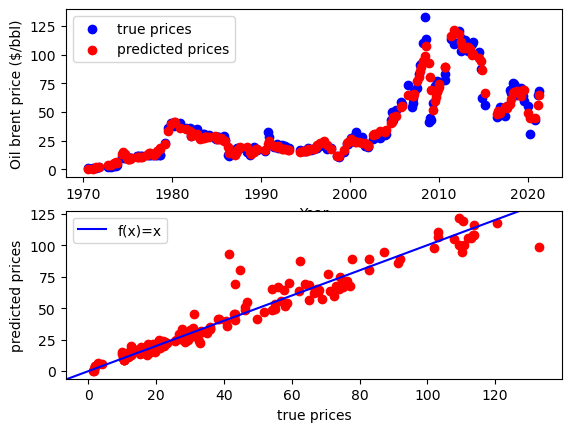

In [14]:
# plot the results of the linear model
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_linear, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_linear, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Linear regression with Ridge penalty

In [15]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100, 200] # try all of these values for alpha
alpha_ridge = 1
best_score_ridge = 0

for alpha in alphas:
    #ridge_model = sklearn.linear_model.Ridge(alpha=0.5, normalize = True)
    linear_ridge_model = make_pipeline(StandardScaler(with_mean=False), sklearn.linear_model.Ridge(alpha=alpha))
    score = cross_validate(linear_ridge_model, x_train, y_train, 10, r2_score, np.mean, False)
    if score > best_score_ridge:
        best_score_ridge = score
        alpha_ridge = alpha

linear_ridge_model = make_pipeline(StandardScaler(with_mean=False), sklearn.linear_model.Ridge(alpha=alpha_ridge))
linear_ridge_model.fit(x_train, y_train)
y_predict_linear_ridge = linear_ridge_model.predict(x_test)
linear_ridge_r2_score = r2_score(y_test, y_predict_linear_ridge)
linear_ridge_mse = mean_squared_error(y_test, y_predict_linear_ridge)
linear_ridge_cv = cross_validate(linear_ridge_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("optimal alpha: ", alpha_ridge)
print("r2 score: ", linear_ridge_r2_score)
print("mse: ", linear_ridge_mse)
print("cross-validation: ", linear_ridge_cv)
model_results["linear_ridge"] = (linear_ridge_r2_score, linear_ridge_mse, linear_ridge_cv)

optimal alpha:  0.0005
r2 score:  0.9415360493915167
mse:  55.47916935764513
cross-validation:  266136460.37427446


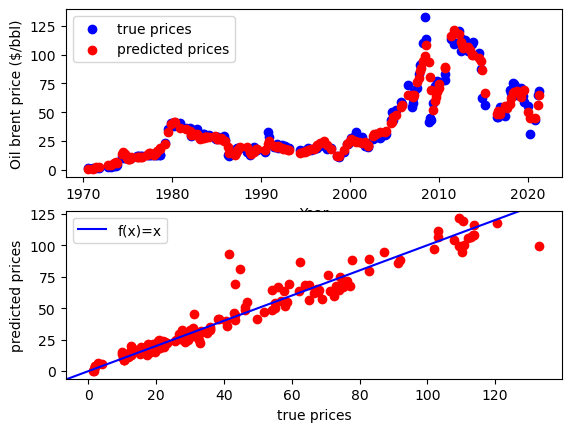

In [16]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_linear_ridge, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_linear_ridge, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Linear regression with Lasso penalty

In [17]:
alphas = [0.1, 0.5, 1, 5, 10, 20, 50, 100, 200]
alpha_lasso = 1
best_score_lasso = 0

for alpha in alphas:
    linear_lasso_model = make_pipeline(StandardScaler(with_mean=False), sklearn.linear_model.Lasso(alpha=alpha))
    score = cross_validate(linear_lasso_model, x_train, y_train, 10, r2_score, np.mean, False)
    if score > best_score_lasso:
        best_score_lasso = score
        alpha_lasso = alpha

linear_lasso_model = make_pipeline(StandardScaler(with_mean=False), sklearn.linear_model.Lasso(alpha=alpha_lasso))
linear_lasso_model.fit(x_train, y_train)
y_predict_linear_lasso = linear_lasso_model.predict(x_test)
linear_lasso_r2_score = r2_score(y_test, y_predict_linear_lasso)
linear_lasso_mse = mean_squared_error(y_test, y_predict_linear_lasso)
linear_lasso_cv = cross_validate(linear_lasso_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("optimal alpha: ", alpha_lasso)
print("r2 score: ", linear_lasso_r2_score)
print("mse: ", linear_lasso_mse)
print("cv: ", linear_lasso_cv)
model_results["linear_lasso"] = (linear_lasso_r2_score, linear_lasso_mse, linear_lasso_cv)

optimal alpha:  0.1
r2 score:  0.9333589963836735
mse:  63.23875631588165
cv:  644679336.2288257


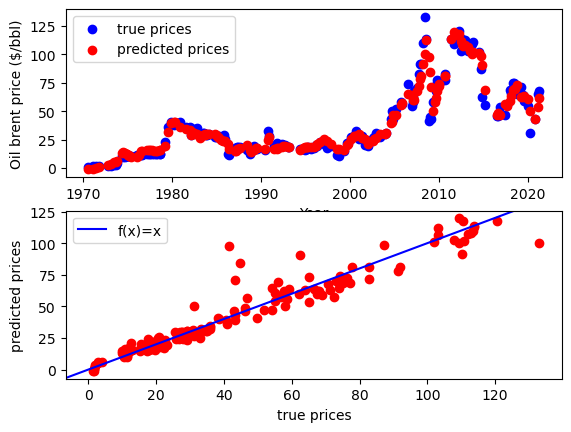

In [18]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_linear_lasso, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_linear_lasso, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Polynomial regression

In [19]:
polynomial_features = sklearn.preprocessing.PolynomialFeatures(degree= 2) # results are generally bad, but degree 2 seems to work
linear_regression = sklearn.linear_model.LinearRegression(fit_intercept=False)
polynomial_model = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
polynomial_model.fit(x_train, y_train)
y_predict_polynomial = polynomial_model.predict(x_test)
polynomial_r2_score = r2_score(y_test, y_predict_polynomial)
polynomial_mse = mean_squared_error(y_test, y_predict_polynomial)
polynomial_cv = cross_validate(polynomial_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("r2 score: ", polynomial_r2_score)
print("mse: ", polynomial_mse)
print("cv: ", polynomial_cv)
model_results["polynomial"] = (polynomial_r2_score, polynomial_mse, polynomial_cv)

r2 score:  -601.8732784942586
mse:  572094.5705972947
cv:  1.2229615249613017e+22


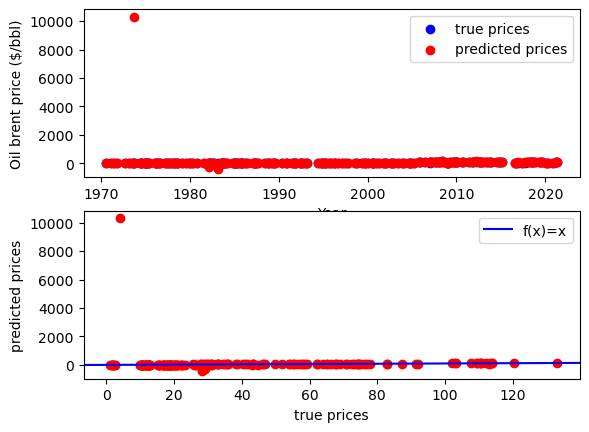

In [20]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_polynomial, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_polynomial, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Polynomial regression with Ridge penalty

In [21]:
degrees = [2, 3, 4] # try these degrees
alphas = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 200] # try for these values of alpha
alpha_ridge = 1
degree_ridge = 1
best_score_ridge = 0
for d in degrees:
    for alpha in alphas:
        polynomial_features_ridge = sklearn.preprocessing.PolynomialFeatures(degree= d)
        linear_regression_ridge = sklearn.linear_model.Ridge(alpha = alpha, fit_intercept=False)
        polynomial_model_ridge = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features_ridge), ("linear_regression", linear_regression_ridge)])
        score = cross_validate(polynomial_model_ridge, x_train, y_train, 10, r2_score, np.mean, False)
        if score > best_score_ridge:
            best_score_ridge = score
            alpha_ridge = alpha
            degree_ridge = d
            
polynomial_features_ridge = sklearn.preprocessing.PolynomialFeatures(degree= degree_ridge)
linear_regression_ridge = sklearn.linear_model.Ridge(alpha = alpha_ridge, fit_intercept=False)
polynomial_model_ridge = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features_ridge), ("linear_regression", linear_regression_ridge)])
polynomial_model_ridge.fit(x_train, y_train)
y_predict_polynomial_ridge = polynomial_model_ridge.predict(x_test)
polynomial_ridge_r2_score = r2_score(y_test, y_predict_polynomial_ridge)
polynomial_ridge_mse = mean_squared_error(y_test, y_predict_polynomial_ridge)
polynomial_ridge_cv = cross_validate(polynomial_model_ridge, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("optimal degree: ", degree_ridge)
print("optimal alpha: ", alpha_ridge)
print("r2 score: ", polynomial_ridge_r2_score)
print("mse: ", polynomial_ridge_mse)
print("cv: ", polynomial_ridge_cv)
model_results["polynomial_ridge"] = (polynomial_ridge_r2_score, polynomial_ridge_mse, polynomial_ridge_cv)

optimal degree:  4
optimal alpha:  0.05
r2 score:  0.9843756617933525
mse:  14.826663207770741
cv:  18610.141423557034


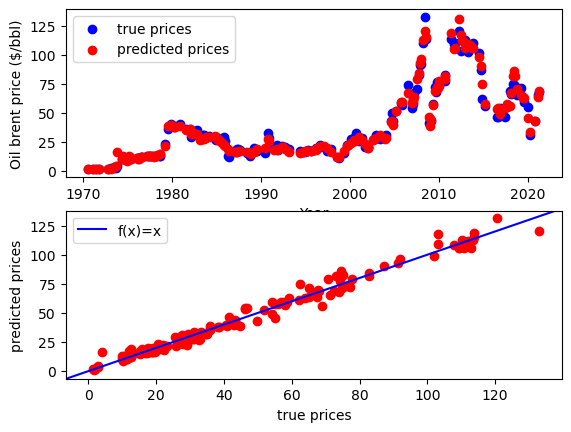

In [22]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_polynomial_ridge, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_polynomial_ridge, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Polynomial regression with Lasso penalty:

In [23]:
degrees = [2, 3, 4] # try polynomials of these degrees
alphas = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 200] # try these values of alpha
alpha_lasso = 1
degree_lasso = 1
best_score_lasso = 0
for d in degrees:
    for alpha in alphas:
        polynomial_features_lasso = sklearn.preprocessing.PolynomialFeatures(degree= d)
        linear_regression_lasso = sklearn.linear_model.Lasso(alpha = alpha, fit_intercept=False)
        polynomial_model_lasso = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features_lasso), ("linear_regression", linear_regression_lasso)])
        score = cross_validate(polynomial_model_lasso, x_train, y_train, 10, r2_score, np.mean, False)
        if score > best_score_lasso:
            best_score_lasso = score
            alpha_lasso = alpha
            degree_lasso = d
            
polynomial_features_lasso = sklearn.preprocessing.PolynomialFeatures(degree= degree_lasso) # all the results seem to be bad
linear_regression_lasso = sklearn.linear_model.Lasso(alpha = alpha_lasso, fit_intercept=False)
polynomial_model_lasso = sklearn.pipeline.Pipeline([("polynomial_features", polynomial_features_lasso), ("linear_regression", linear_regression_lasso)])
polynomial_model_lasso.fit(x_train, y_train)
y_predict_polynomial_lasso = polynomial_model_lasso.predict(x_test)
polynomial_lasso_r2_score = r2_score(y_test, y_predict_polynomial_lasso)
polynomial_lasso_mse = mean_squared_error(y_test, y_predict_polynomial_lasso)
polynomial_lasso_cv = cross_validate(polynomial_model_lasso, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("optimal degree: ", degree_lasso)
print("optimal alpha: ", alpha_lasso)
print("r2 score: ", polynomial_lasso_r2_score)
print("mse: ", polynomial_lasso_mse)
print("cv: ", polynomial_lasso_cv)
model_results["polynomial_lasso"] = (polynomial_lasso_r2_score, polynomial_lasso_mse, polynomial_lasso_cv)

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e+03, tolerance: 8.709e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e+03, tolerance: 8.855e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+03, toleranc

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.485e+03, tolerance: 9.122e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.181e+03, tolerance: 8.550e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.642e+03, toleranc

C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e+03, tolerance: 9.063e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e+03, tolerance: 8.847e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+03, toleranc

optimal degree:  3
optimal alpha:  0.005
r2 score:  0.9547047134762644
mse:  42.98280985118291
cv:  2548.975667086903


C:\Users\bogda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+03, tolerance: 4.870e+01
  model = cd_fast.enet_coordinate_descent(


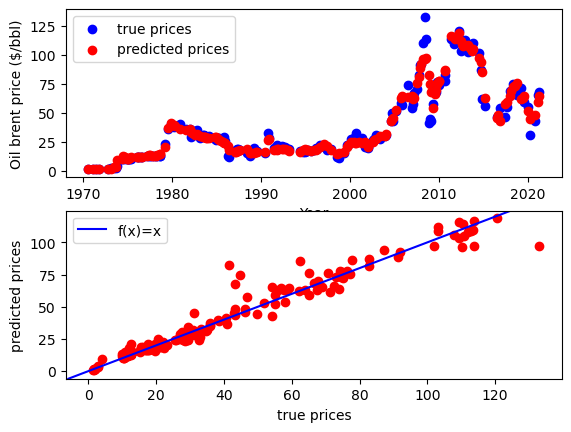

In [24]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_polynomial_lasso, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_polynomial_lasso, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Decision trees

### Bagging regressor

In [25]:
# different hyper-parameters to try
depths = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
estimators = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] 
samples_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_mse = math.inf
max_depth = 0
num_estimators = 0
max_samples_features = 0

for d in depths:
     for e in estimators:
            for sf in samples_features:
                bagging_model = BaggingRegressor(DecisionTreeRegressor(max_depth=d),n_estimators=e, max_samples=sf, max_features=sf)
                bagging_model.fit(x_train, y_train)
                prediction = bagging_model.predict(x_test)
                mse = mean_squared_error(prediction, y_test)
                if mse<min_mse:
                    min_mse = mse
                    max_depth = d
                    num_estimators = e
                    max_samples_features = sf
bagging_model = BaggingRegressor(DecisionTreeRegressor(max_depth=max_depth),n_estimators=num_estimators, max_samples=max_samples_features, max_features=max_samples_features)
bagging_model.fit(x_train, y_train)
y_predict_bagging = bagging_model.predict(x_test)
bagging_r2_score = r2_score(y_test, y_predict_bagging)
bagging_mse = mean_squared_error(y_test, y_predict_bagging)
bagging_cv = cross_validate(bagging_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("max_depth: ", max_depth)
print("num_estimators: ", num_estimators)
print("max_samples: ", max_samples_features)
print("max_features: ", max_samples_features)
print("mse: ", bagging_mse)
print("r2 score: ", bagging_r2_score)
print("cv: ", bagging_cv)
model_results["bagging"] = (bagging_r2_score, bagging_mse, bagging_cv)

max_depth:  20
num_estimators:  4
max_samples:  0.9
max_features:  0.9
mse:  41.219362179750945
r2 score:  0.9565630346940646
cv:  595.2714603866647


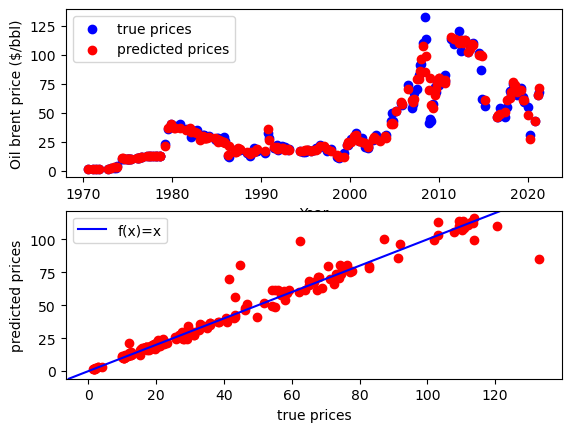

In [26]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_bagging, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_bagging, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

### AdaBoost

In [27]:
# tuning the hyper-parameters:
depths = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
estimators = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
min_mse = math.inf
max_depth = 0
num_estimators = 0

for d in depths:
     for e in estimators:
            for sf in samples_features:
                adaboost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=d),n_estimators=e)
                adaboost_model.fit(x_train, y_train)
                prediction = adaboost_model.predict(x_test)
                mse = mean_squared_error(prediction, y_test)
                if mse<min_mse:
                    min_mse = mse
                    max_depth = d
                    num_estimators = e
                    max_samples_features = sf
adaboost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth),n_estimators=num_estimators)
adaboost_model.fit(x_train, y_train)
y_predict_adaboost = adaboost_model.predict(x_test)
adaboost_r2_score = r2_score(y_test, y_predict_adaboost)
adaboost_mse = mean_squared_error(y_test, y_predict_adaboost)
adaboost_cv = cross_validate(adaboost_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("max_depth: ", max_depth)
print("num_estimators: ", num_estimators)
print("mse: ", adaboost_mse)
print("r2 score: ", adaboost_r2_score)
print("cv: ", adaboost_cv)
model_results["adaboost"] = (adaboost_r2_score, adaboost_mse, adaboost_cv)

max_depth:  50
num_estimators:  50
mse:  29.959870967741924
r2 score:  0.9684282869268801
cv:  279.1755549790532


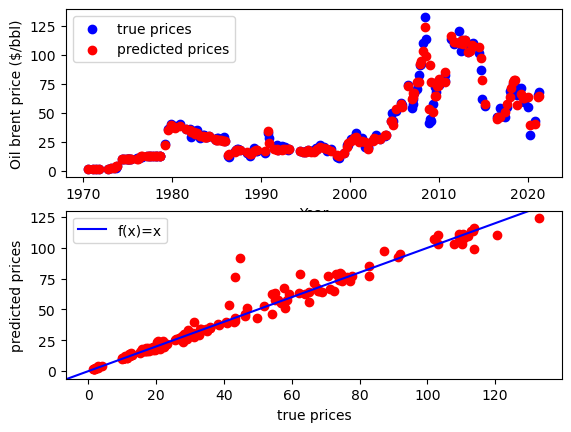

In [28]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_adaboost, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_adaboost, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

### Gradient Boosting regressor

In [29]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
y_predict_gb = gb_model.predict(x_test)
gb_r2_score = r2_score(y_test, y_predict_gb)
gb_mse = mean_squared_error(y_test, y_predict_gb)
gb_cv = cross_validate(gb_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("r2 score: ", gb_r2_score)
print("mse: ", gb_mse)
print("cross_validation: ", gb_cv)
model_results["gradient_boosting"] = (gb_r2_score, gb_mse, gb_cv)

r2 score:  0.961981446048883
mse:  36.077578942821695
cross_validation:  304.7947511354112


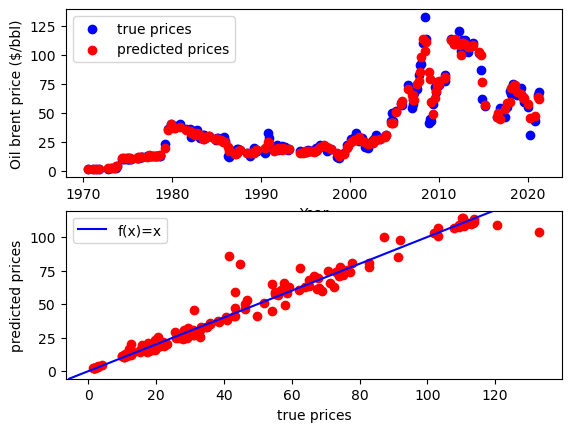

In [30]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_gb, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_gb, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

### Extreme Gradient Boosting Regressor

In [31]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
y_predict_xgb = xgb_model.predict(x_test)
xgb_r2_score = r2_score(y_test, y_predict_xgb)
xgb_mse = mean_squared_error(y_test, y_predict_xgb)
xgb_cv = cross_validate(xgb_model, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("r2 score: ", xgb_r2_score)
print("mse: ", xgb_mse)
print("cross-validation score: ", xgb_cv)
model_results["xgb_regressor"] = (xgb_r2_score, xgb_mse, xgb_cv)

r2 score:  0.9669511247550565
mse:  31.36161904405848
cross-validation score:  401.37278861869487


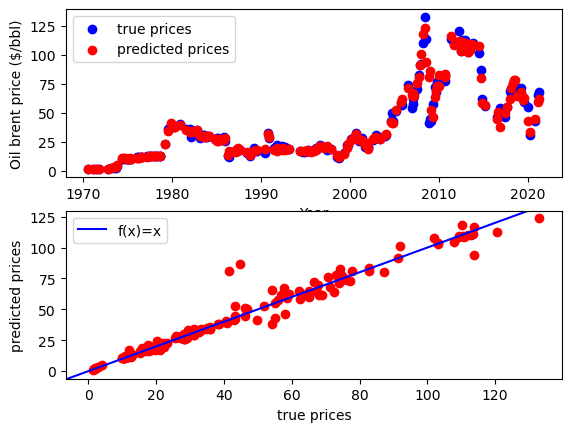

In [32]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_xgb, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_xgb, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

### Random forest

In [33]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)
y_predict_forest = forest.predict(x_test)
forest_r2_score = r2_score(y_test, y_predict_forest)
forest_mse = mean_squared_error(y_test, y_predict_forest)
forest_cv = cross_validate(forest, df, oil_prices, 4, mean_squared_error, np.mean, False)
print("r2 score: ", forest_r2_score)
print("mse: ", forest_mse)
print("cross-validation score: ", forest_cv)
model_results["random_forest"] = (forest_r2_score, forest_mse, forest_cv)

r2 score:  0.9506011943072742
mse:  46.87683056940849
cross-validation score:  251.59578204175645


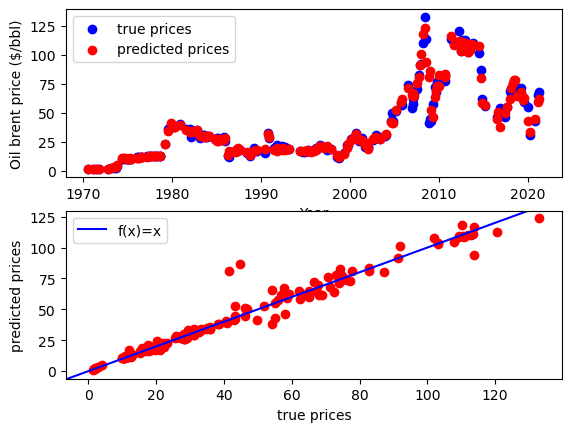

In [34]:
years = years_transform(x_test['Year'])
fig, axs = plt.subplots(2)
axs[0].scatter(years, y_test, color = 'blue', label = 'true prices')
axs[0].scatter(years, y_predict_xgb, color = 'red', label = 'predicted prices')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Oil brent price ($/bbl)')
axs[0].legend()

axs[1].scatter(y_test, y_predict_xgb, color = 'red')
axs[1].axline((0, 0), slope = 1, color = 'blue', label = 'f(x)=x')
axs[1].set_xlabel('true prices')
axs[1].set_ylabel('predicted prices')
axs[1].legend()
plt.show()

## Summing up the results

In [35]:
comparison_r2 = sorted(model_results.items(), key = lambda x:x[1], reverse = True)
print(comparison_r2)

[('polynomial_ridge', (0.9843756617933525, 14.826663207770741, 18610.141423557034)), ('adaboost', (0.9684282869268801, 29.959870967741924, 279.1755549790532)), ('xgb_regressor', (0.9669511247550565, 31.36161904405848, 401.37278861869487)), ('gradient_boosting', (0.961981446048883, 36.077578942821695, 304.7947511354112)), ('bagging', (0.9565630346940646, 41.219362179750945, 595.2714603866647)), ('polynomial_lasso', (0.9547047134762644, 42.98280985118291, 2548.975667086903)), ('random_forest', (0.9506011943072742, 46.87683056940849, 251.59578204175645)), ('linear_regression', (0.9416399040316498, 55.380616846079405, 294858597.990079)), ('linear_ridge', (0.9415360493915167, 55.47916935764513, 266136460.37427446)), ('linear_lasso', (0.9333589963836735, 63.23875631588165, 644679336.2288257)), ('polynomial', (-601.8732784942586, 572094.5705972947, 1.2229615249613017e+22))]


In [36]:
comparison_mse = sorted(model_results.items(), key = lambda x:(x[1][1], x[1][0], x[1][2]))
print(comparison_mse)

[('polynomial_ridge', (0.9843756617933525, 14.826663207770741, 18610.141423557034)), ('adaboost', (0.9684282869268801, 29.959870967741924, 279.1755549790532)), ('xgb_regressor', (0.9669511247550565, 31.36161904405848, 401.37278861869487)), ('gradient_boosting', (0.961981446048883, 36.077578942821695, 304.7947511354112)), ('bagging', (0.9565630346940646, 41.219362179750945, 595.2714603866647)), ('polynomial_lasso', (0.9547047134762644, 42.98280985118291, 2548.975667086903)), ('random_forest', (0.9506011943072742, 46.87683056940849, 251.59578204175645)), ('linear_regression', (0.9416399040316498, 55.380616846079405, 294858597.990079)), ('linear_ridge', (0.9415360493915167, 55.47916935764513, 266136460.37427446)), ('linear_lasso', (0.9333589963836735, 63.23875631588165, 644679336.2288257)), ('polynomial', (-601.8732784942586, 572094.5705972947, 1.2229615249613017e+22))]


In [37]:
comparison_cv = sorted(model_results.items(), key = lambda x:(x[1][2], x[1][0], x[1][1]))
print(comparison_cv)

[('random_forest', (0.9506011943072742, 46.87683056940849, 251.59578204175645)), ('adaboost', (0.9684282869268801, 29.959870967741924, 279.1755549790532)), ('gradient_boosting', (0.961981446048883, 36.077578942821695, 304.7947511354112)), ('xgb_regressor', (0.9669511247550565, 31.36161904405848, 401.37278861869487)), ('bagging', (0.9565630346940646, 41.219362179750945, 595.2714603866647)), ('polynomial_lasso', (0.9547047134762644, 42.98280985118291, 2548.975667086903)), ('polynomial_ridge', (0.9843756617933525, 14.826663207770741, 18610.141423557034)), ('linear_ridge', (0.9415360493915167, 55.47916935764513, 266136460.37427446)), ('linear_regression', (0.9416399040316498, 55.380616846079405, 294858597.990079)), ('linear_lasso', (0.9333589963836735, 63.23875631588165, 644679336.2288257)), ('polynomial', (-601.8732784942586, 572094.5705972947, 1.2229615249613017e+22))]


After several runs with different selected features and averaging strategies, the decision trees seem to be a good choice for a fast oil price prediction.